In [1]:
%run ../chap08/cnn_reg_model.ipynb
%run ../chap05/dataset_flowers.ipynb
%run ../chap06/dataset_office31.ipynb

In [2]:
fd = FlowersDataset([96, 96], [96, 96, 3])
od = Office31Dataset([96, 96], [96, 96, 3])

Model flowers_model_1 train started:
    Epoch 2: cost=1.603, accuracy=0.242/0.190 (13/13 secs)
    Epoch 4: cost=1.600, accuracy=0.242/0.220 (21/34 secs)
    Epoch 6: cost=1.600, accuracy=0.242/0.220 (12/46 secs)
    Epoch 8: cost=1.600, accuracy=0.242/0.230 (13/59 secs)
    Epoch 10: cost=1.600, accuracy=0.242/0.250 (13/72 secs)
Model flowers_model_1 train ended in 72 secs:
Model flowers_model_1 test report: accuracy = 0.253, (0 secs)

Model flowers_model_1 Visualization


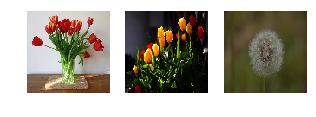

추정확률분포 [18,18,22,17,24] => 추정 dandelion : 정답 tulip => X
추정확률분포 [18,18,22,17,24] => 추정 dandelion : 정답 tulip => X
추정확률분포 [18,18,22,17,24] => 추정 dandelion : 정답 dandelion => O


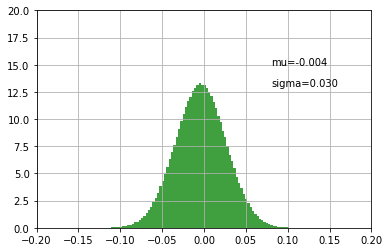

Near 0 parameters =  0.0%(187/829790)


In [3]:
fm1 = CnnRegModel('flowers_model_1', fd, [30,10])
fm1.exec_all(epoch_count=10, report=2, show_params=True)

Model flowers_model_2 train ended in 352 secs:
Model flowers_model_2 test report: accuracy = 0.253, (0 secs)



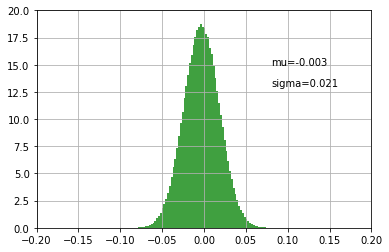

Near 0 parameters =  0.0%(317/829790)


In [4]:
fm2 = CnnRegModel('flowers_model_2', fd, [30,10], l2_decay=0.1)
fm2.exec_all(epoch_count=10, show_cnt=0, show_params=True)

Model flowers_model_3 train ended in 354 secs:
Model flowers_model_3 test report: accuracy = 0.253, (0 secs)



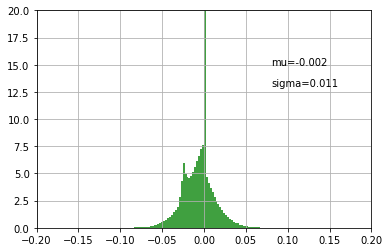

Near 0 parameters = 71.7%(594792/829790)


In [5]:
fm3 = CnnRegModel('flowers_model_3', fd, [30,10], l1_decay=0.01)
fm3.exec_all(epoch_count=10, show_cnt=0, show_params=True)

Model flowers_cnn_1 train started:
    Epoch 2: cost=1.132, accuracy=0.549/0.600 (91/91 secs)
    Epoch 4: cost=0.931, accuracy=0.643/0.590 (89/180 secs)
    Epoch 6: cost=0.774, accuracy=0.702/0.660 (92/272 secs)
    Epoch 8: cost=0.649, accuracy=0.751/0.650 (91/363 secs)
    Epoch 10: cost=0.532, accuracy=0.801/0.540 (90/453 secs)
Model flowers_cnn_1 train ended in 453 secs:
Model flowers_cnn_1 test report: accuracy = 0.650, (3 secs)

Model flowers_cnn_1 Visualization


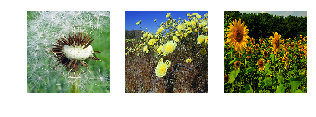

추정확률분포 [ 5, 6,24,14,52] => 추정 dandelion : 정답 dandelion => O
추정확률분포 [ 7, 4, 2,86, 2] => 추정 sunflower : 정답 dandelion => X
추정확률분포 [ 0, 0, 2,98, 0] => 추정 sunflower : 정답 sunflower => O


In [6]:
fcnn1 = CnnRegModel('flowers_cnn_1', fd,
               [['conv',{'ksize':3, 'chn':6}],
                ['max',{'stride':2}],
                ['conv',{'ksize':3, 'chn':12}],
                ['max',{'stride':2}],
                ['conv',{'ksize':3, 'chn':24}],
                ['avg',{'stride':3}]])
fcnn1.exec_all(epoch_count=10, report=2)

In [7]:
fcnn2 = CnnRegModel('flowers_cnn_2', fd,
               [['conv',{'ksize':3, 'chn':6}],
                ['max',{'stride':2}],
                ['dropout', {'keep_prob':0.6}],
                ['conv',{'ksize':3, 'chn':12}],
                ['max',{'stride':2}],
                ['dropout', {'keep_prob':0.6}],
                ['conv',{'ksize':3, 'chn':24}],
                ['avg',{'stride':3}],
                ['dropout', {'keep_prob':0.6}]])
fcnn2.exec_all(epoch_count=10, report=2, show_cnt=0)

Model flowers_cnn_2 train started:
    Epoch 2: cost=1.215, accuracy=0.484/0.490 (93/93 secs)
    Epoch 4: cost=1.039, accuracy=0.579/0.500 (93/186 secs)
    Epoch 6: cost=0.983, accuracy=0.617/0.490 (94/280 secs)
    Epoch 8: cost=0.920, accuracy=0.635/0.650 (94/374 secs)
    Epoch 10: cost=0.890, accuracy=0.658/0.510 (93/467 secs)
Model flowers_cnn_2 train ended in 467 secs:
Model flowers_cnn_2 test report: accuracy = 0.507, (4 secs)



In [8]:
noise_std = 0.01
fcnn3 = CnnRegModel('flowers_cnn_3', fd,
               [['noise', {'type':'normal','mean':0,'std':noise_std}],
                ['conv',{'ksize':3, 'chn':6}],
                ['max',{'stride':2}],
                ['noise', {'type':'normal','mean':0,'std':noise_std}],
                ['conv',{'ksize':3, 'chn':12}],
                ['max',{'stride':2}],
                ['noise', {'type':'normal','mean':0,'std':noise_std}],
                ['conv',{'ksize':3, 'chn':24}],
                ['avg',{'stride':3}]])
fcnn3.exec_all(epoch_count=10, report=2, show_cnt=0)

Model flowers_cnn_3 train started:
    Epoch 2: cost=1.145, accuracy=0.523/0.520 (103/103 secs)
    Epoch 4: cost=0.961, accuracy=0.630/0.600 (103/206 secs)
    Epoch 6: cost=0.825, accuracy=0.692/0.590 (103/309 secs)
    Epoch 8: cost=0.691, accuracy=0.742/0.630 (103/412 secs)
    Epoch 10: cost=0.583, accuracy=0.784/0.690 (104/516 secs)
Model flowers_cnn_3 train ended in 516 secs:
Model flowers_cnn_3 test report: accuracy = 0.621, (3 secs)



In [9]:
fcnn4 = CnnRegModel('flowers_cnn_4', fd,
               [['batch_normal'],
                ['conv',{'ksize':3, 'chn':6}],
                ['max',{'stride':2}],
                ['batch_normal'],
                ['conv',{'ksize':3, 'chn':12}],
                ['max',{'stride':2}],
                ['batch_normal'],
                ['conv',{'ksize':3, 'chn':24}],
                ['avg',{'stride':3}]])
fcnn4.exec_all(epoch_count=10, report=2, show_cnt=0)

Model flowers_cnn_4 train started:
    Epoch 2: cost=1.094, accuracy=0.557/0.380 (105/105 secs)
    Epoch 4: cost=0.947, accuracy=0.632/0.230 (105/210 secs)
    Epoch 6: cost=0.830, accuracy=0.677/0.260 (103/313 secs)
    Epoch 8: cost=0.736, accuracy=0.725/0.430 (103/416 secs)
    Epoch 10: cost=0.635, accuracy=0.768/0.680 (102/518 secs)
Model flowers_cnn_4 train ended in 518 secs:
Model flowers_cnn_4 test report: accuracy = 0.542, (4 secs)

